In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lib.functions import column_datetime_timedelta

In [4]:
#import processed data
NYSE_Weather = pd.read_csv('../data/NYSE_Weather.csv')
NYSE_Weather.head()

,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,HOS_Numeric,temp,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,sunrise,sunset,conditions,description
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,0 days 09:20:42,9.345000,0.3,54.6,0.000,none,0.0,26.2,100.0,25.2,07:20:26,16:41:08,Overcast,Cloudy skies throughout the day.
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,0 days 09:21:36,9.360000,-1.1,58.1,1.247,"rain,snow",0.0,23.0,99.1,18.9,07:20:26,16:42:02,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,0 days 09:24:39,9.410833,2.9,78.3,0.000,none,0.0,22.1,99.3,13.3,07:20:15,16:44:54,Overcast,Cloudy skies throughout the day.
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,0 days 09:25:46,9.429444,-1.5,57.0,0.000,none,0.0,46.8,32.1,29.5,07:20:07,16:45:53,Partially cloudy,Partly cloudy throughout the day.
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,0 days 09:26:59,9.449722,-7.9,51.4,0.000,none,0.0,40.8,0.9,34.5,07:19:56,16:46:55,Clear,Clear conditions throughout the day.


In [3]:
NYSE_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               9802 non-null   object 
 1   Open               9802 non-null   float64
 2   Close              9802 non-null   float64
 3   Volume             9802 non-null   float64
 4   Returns            9802 non-null   float64
 5   Hours_of_Sunlight  9802 non-null   object 
 6   HOS_Numeric        9802 non-null   float64
 7   temp               9802 non-null   float64
 8   humidity           9802 non-null   float64
 9   precip             9802 non-null   float64
 10  preciptype         9802 non-null   object 
 11  snow               9802 non-null   float64
 12  windspeed          9802 non-null   float64
 13  cloudcover         9802 non-null   float64
 14  visibility         9802 non-null   float64
 15  sunrise            9802 non-null   object 
 16  sunset             9802 

In [5]:
#Converting the dates and time interval columns from string to datetime/timedelta
NYSE_Weather = column_datetime_timedelta(NYSE_Weather, 'Date', 'Hours_of_Sunlight')

In [5]:
NYSE_Weather.describe()

,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,HOS_Numeric,temp,humidity,precip,snow,windspeed,cloudcover,visibility
count,9802,9802.000000,9802.000000,9.802000e+03,9802.000000,9802,9802.000000,9802.000000,9802.000000,9802.000000,9802.000000,9802.000000,9802.000000,9802.000000
mean,2004-06-06 20:10:14.078759296,7037.140698,7037.630505,2.007240e+09,0.034336,0 days 12:13:45.743317690,12.229373,13.264599,63.843481,2.867549,0.002785,23.250663,55.395297,16.075423
min,1985-01-03 00:00:00,1000.270020,1000.270020,0.000000e+00,-19.173303,0 days 09:14:59,9.249722,-17.100000,19.300000,0.000000,0.000000,6.700000,0.000000,1.000000
25%,1994-09-13 06:00:00,2723.847473,2723.847473,0.000000e+00,-0.417517,0 days 10:18:37.500000,10.310417,5.700000,52.700000,0.000000,0.000000,17.900000,31.000000,13.800000
50%,2004-06-05 12:00:00,6698.145019,6698.159912,1.527440e+09,0.064410,0 days 12:15:04.500000,12.251250,13.500000,63.000000,0.000000,0.000000,22.200000,55.900000,15.900000
75%,2014-03-02 06:00:00,10057.235107,10064.095215,3.686898e+09,0.537075,0 days 14:09:47.750000,14.163264,21.600000,74.900000,1.423000,0.000000,27.400000,81.800000,16.000000
max,2023-11-22 00:00:00,17353.759766,17353.759766,1.145623e+10,12.216238,0 days 15:05:40,15.094444,34.200000,99.800000,156.355000,8.400000,66.600000,100.000000,39.700000
std,NaN,4253.515223,4253.702605,2.026211e+09,1.109115,0 days 01:59:39.950789985,1.994431,9.372474,14.892222,7.880304,0.105242,7.440765,29.704758,5.383133


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'Returns'}>,
        <Axes: title={'center': 'HOS_Numeric'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'precip'}>,
        <Axes: title={'center': 'snow'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'visibility'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

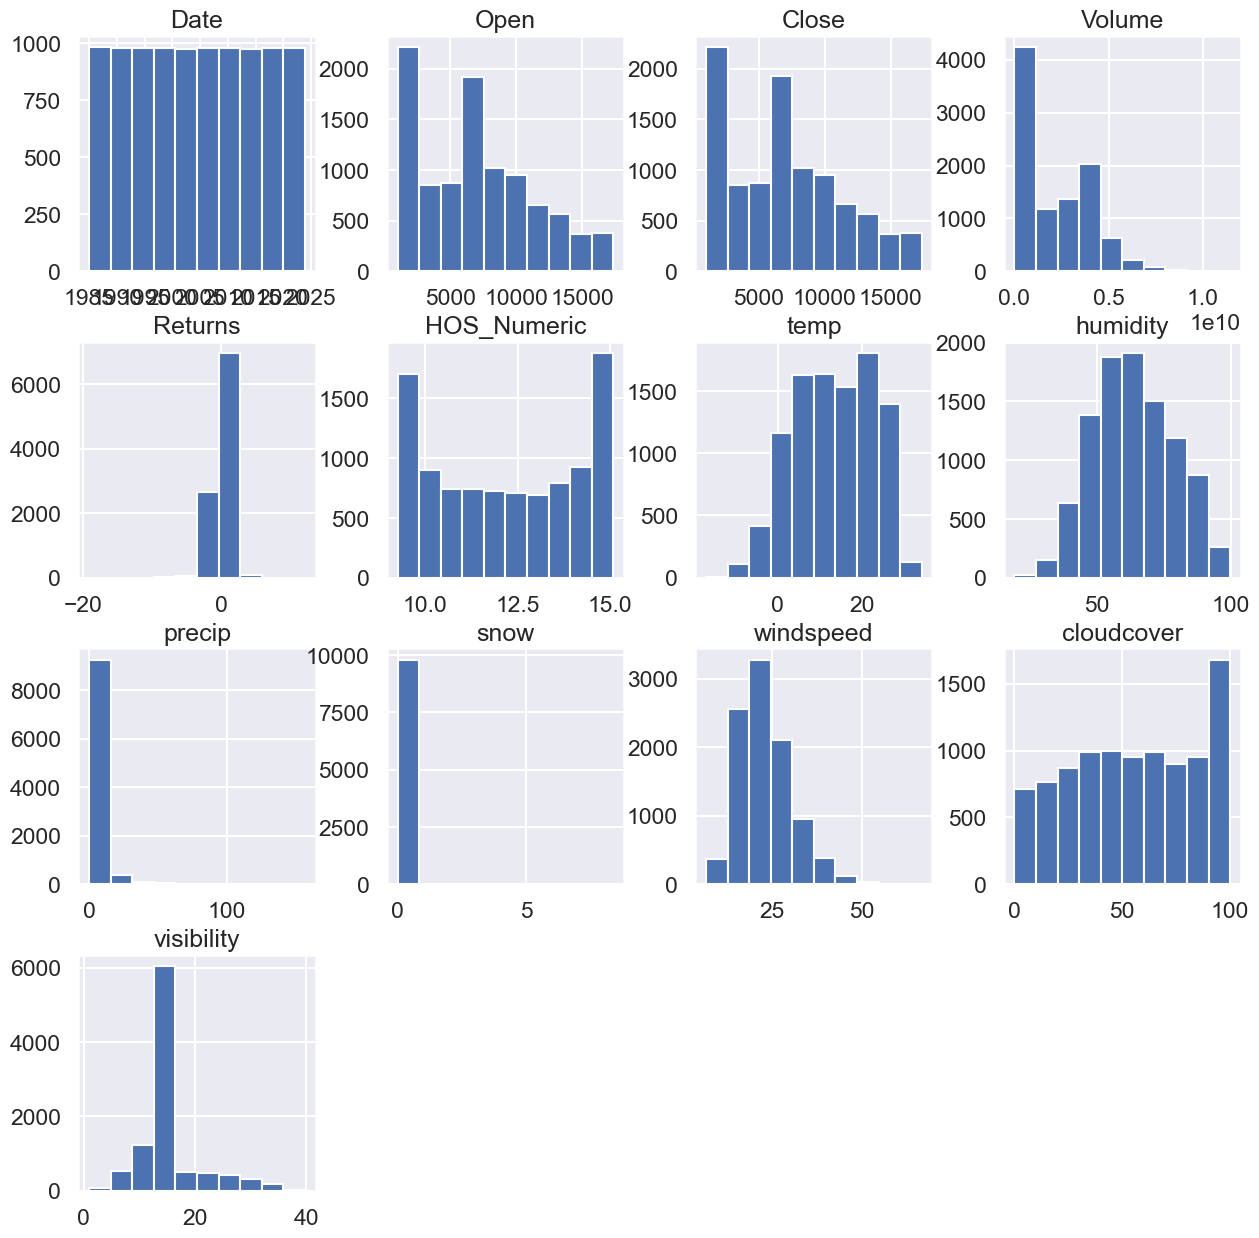

In [6]:
#setting theme and plotting distributions
sns.set_theme(style = 'darkgrid', context = 'talk')
NYSE_Weather.hist(figsize=(15,15))

<u> Notable Features </u>
- Dealing with stocks, Open and Close having similar distributions is to be expected
- precip and snow variables have lots of 0s
- Volume is rightward skewed 
    - missing information around the composite's conception (1985 onward)
    - volume gradually increases over time, expect the skewness to exist perpetually
- Returns is not evenly distributed
    - Potentially due to presence of outliers
    - An issue when calculating means
    

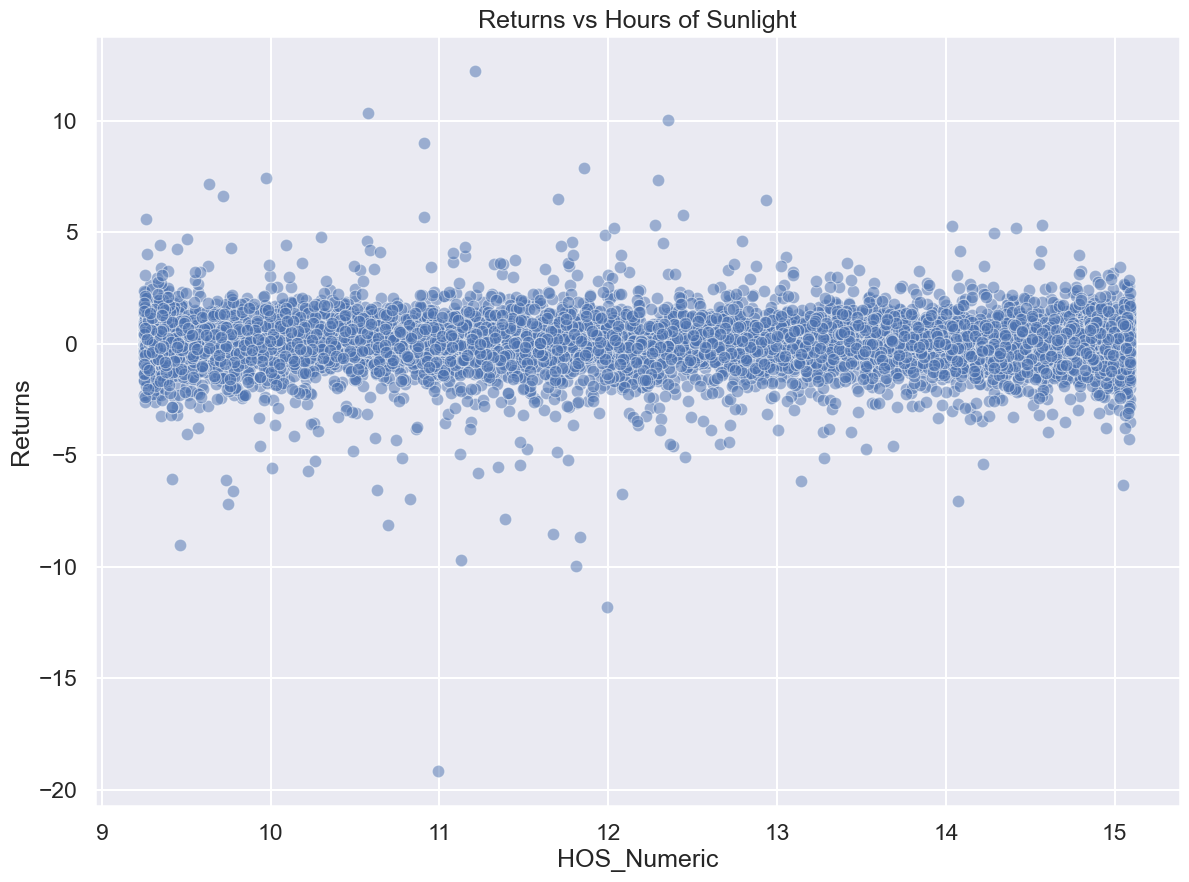

In [50]:
#scatter returns on hours of sunlight
plt.figure(figsize=(14,10))

sns.scatterplot(x=NYSE_Weather['HOS_Numeric'], y=NYSE_Weather['Returns'], alpha=0.5)
plt.title('Returns vs Hours of Sunlight')

#saving image
plt.savefig('../images/initial_scatter.png')

### Calculating Average Monthly Returns and Hours of Sunlight (both with and without outliers)

In [7]:
#removing outliers 
q1 = NYSE_Weather['Returns'].quantile(0.25)
q3 = NYSE_Weather['Returns'].quantile(0.75)
IQR = q3 - q1

#defining boundaries
lowerBound = q1 - IQR*1.5
upperBound = q3 + IQR*1.5

#creating seperate dataframe without outliers to calculate averages
NYC_no_outliers = NYSE_Weather[(NYSE_Weather['Returns'] >= lowerBound) & (NYSE_Weather['Returns'] <= upperBound)]
NYC_no_outliers['HOS_Numeric'] = pd.to_timedelta(NYC_no_outliers['Hours_of_Sunlight']).dt.total_seconds() / 3600

C:\Users\l3onw\AppData\Local\Temp\ipykernel_17660\2587775180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_no_outliers['HOS_Numeric'] = pd.to_timedelta(NYC_no_outliers['Hours_of_Sunlight']).dt.total_seconds() / 3600


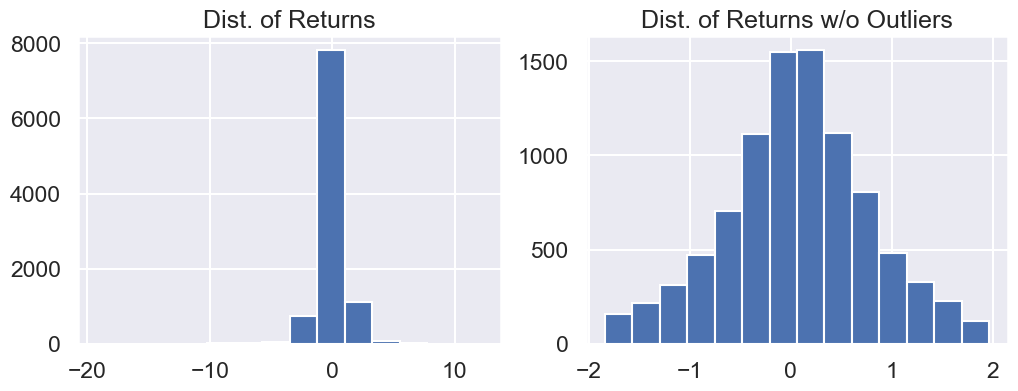

In [8]:
#Distribution of returns (w/ and w/o outliers)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(NYSE_Weather['Returns'], bins = 14)
axes[0].set_title('Dist. of Returns')

axes[1].hist(NYC_no_outliers['Returns'], bins = 14)
axes[1].set_title('Dist. of Returns w/o Outliers')

#save figure
plt.savefig('../images/returns_dist.png')
# Much more resembles a normal distribution after removing outliers

- The distribution of returns now much more resembles a normal distribution after removing outliers

Average Monthly Returns

In [10]:
#Calculating average monthly returns (includes outliers)
avg_return = NYSE_Weather['Returns'].groupby(NYSE_Weather['Date'].dt.month).mean()

#average monthly return w/o outliers
avg_return_NO = NYC_no_outliers['Returns'].groupby(NYC_no_outliers['Date'].dt.month).mean()

Average Hours of Sunlight by Month

In [11]:
# Group by month and calculate the mean
avg_sunlight = NYSE_Weather.groupby(NYSE_Weather['Date'].dt.month)['Hours_of_Sunlight'].mean()

#Converting timedeltas into fractions of hours
avg_sunlight_hours = avg_sunlight.dt.total_seconds() / 3600


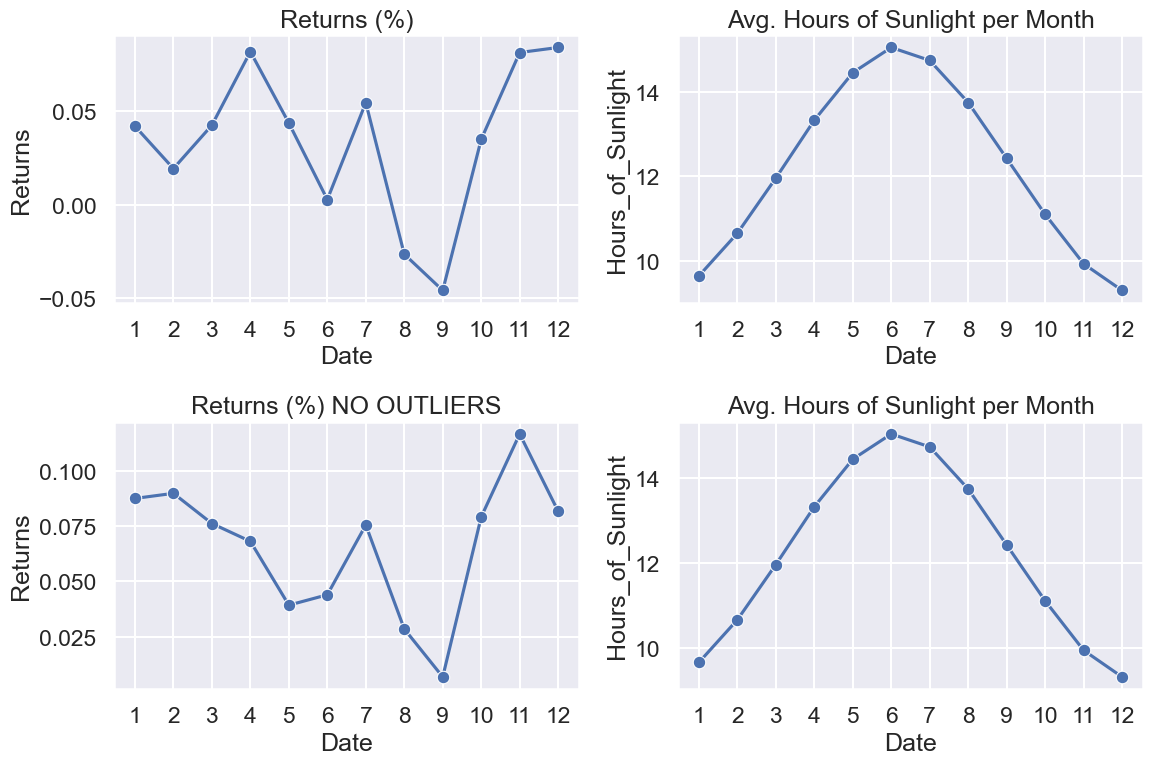

In [35]:
# Returns vs Sunlight
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.lineplot(ax=axes[0,0], data= avg_return, marker='o')
sns.lineplot(ax=axes[0,1], data= avg_sunlight_hours, marker='o')
sns.lineplot(ax=axes[1,0], data= avg_return_NO, marker='o')
sns.lineplot(ax=axes[1,1], data= avg_sunlight_hours, marker='o')

axes[0,0].set_title('Returns (%)')
axes[0,0].set_xticks(range(1, 13))

axes[0,1].set_title('Avg. Hours of Sunlight per Month')
axes[0,1].set_xticks(range(1, 13))

axes[1,0].set_title('Returns (%) NO OUTLIERS')
axes[1,0].set_xticks(range(1, 13))

axes[1,1].set_title('Avg. Hours of Sunlight per Month')
axes[1,1].set_xticks(range(1, 13))
#clean layout
plt.tight_layout()

#saving graphs
plt.savefig('../images/returns_HOS.png')

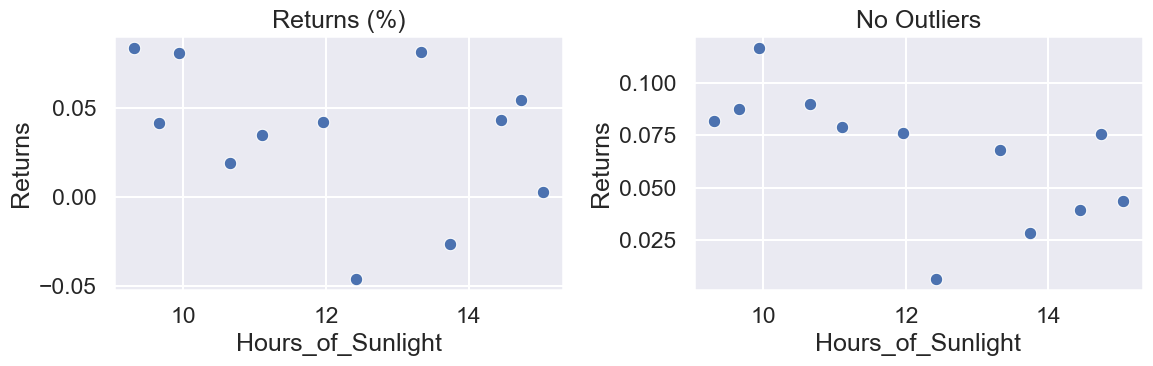

In [13]:
#plotting returns vs HOS to see relationship
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.scatterplot(ax=axes[0], x=avg_sunlight_hours, y=avg_return)
sns.scatterplot(ax=axes[1], x=avg_sunlight_hours, y=avg_return_NO)

axes[0].set_title('Returns (%)')
axes[1].set_title('No Outliers')

plt.tight_layout()

#saving graphs
plt.savefig('../images/avgRvsHOS_outlier_NO.png')

- Negative correlation between returns and hours of sunlight
- Correlation is more present without the presence of outliers

In [36]:
#Store monthly information into seperate dataframe
Monthly_NYC = pd.DataFrame(avg_return)
Monthly_NYC['Avg_Returns_N/O'] = avg_return_NO
Monthly_NYC['Hours_of_Sunlight(Time)'] = avg_sunlight
Monthly_NYC['Hours_of_Sunlight(Numeric)'] = avg_sunlight_hours
Monthly_NYC.rename(columns={'Returns' :'Avg_Returns'}, inplace=True)

#.iloc to access specific months
Monthly_NYC.reset_index(inplace=True)
Monthly_NYC.head()

,Date,Avg_Returns,Avg_Returns_N/O,Hours_of_Sunlight(Time),Hours_of_Sunlight(Numeric)
0,1,0.042002,0.087407,0 days 09:39:17.951371571,9.654986
1,2,0.019312,0.089709,0 days 10:39:37.815261044,10.660504
2,3,0.042535,0.076085,0 days 11:57:43.722482435,11.962145
3,4,0.081893,0.068025,0 days 13:19:36.336645962,13.326760
4,5,0.043694,0.039235,0 days 14:26:51.105454545,14.447529


<Axes: >

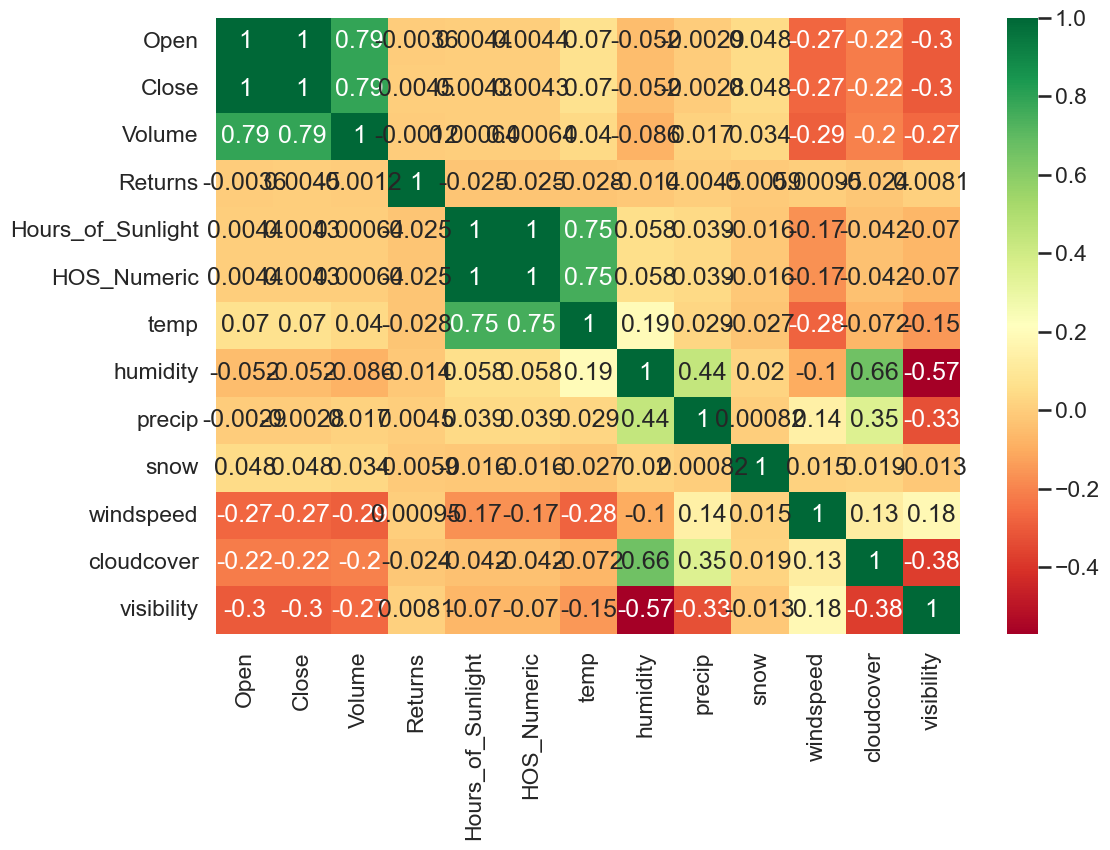

In [40]:
#NYSE_Weather 
#correlation matrix of all integers and timedelta variables
corr_matrix = NYC_no_outliers.select_dtypes(include=[np.float64, np.timedelta64]).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,  annot=True, cmap='RdYlGn')

<Axes: >

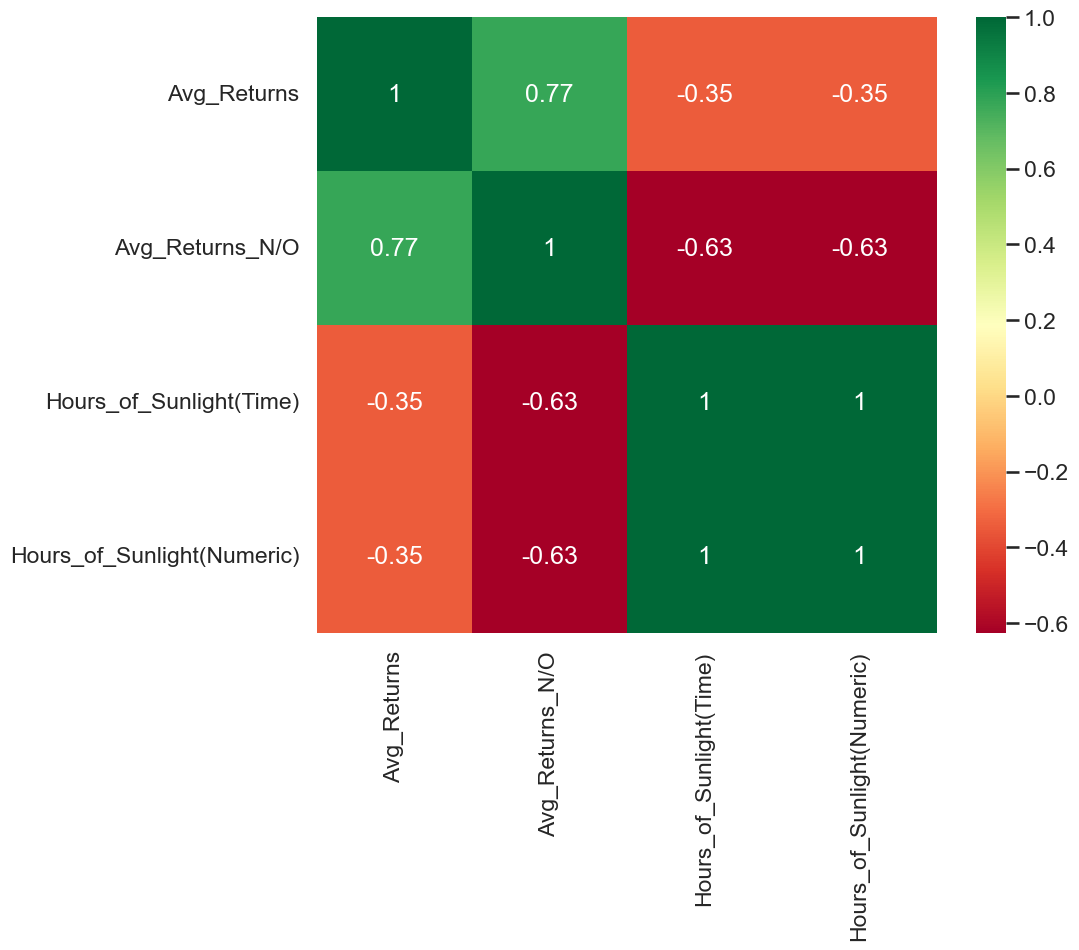

In [39]:
#Monthly_NYC
#correlation matrix for aggregated monthly dataset
corr_matrix = Monthly_NYC.drop('Date', axis=1).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,  annot=True, cmap='RdYlGn')

Without outliers, there is a significant negative correlation between avg. monthly returns and avg. hours of sunlight (-0.63)

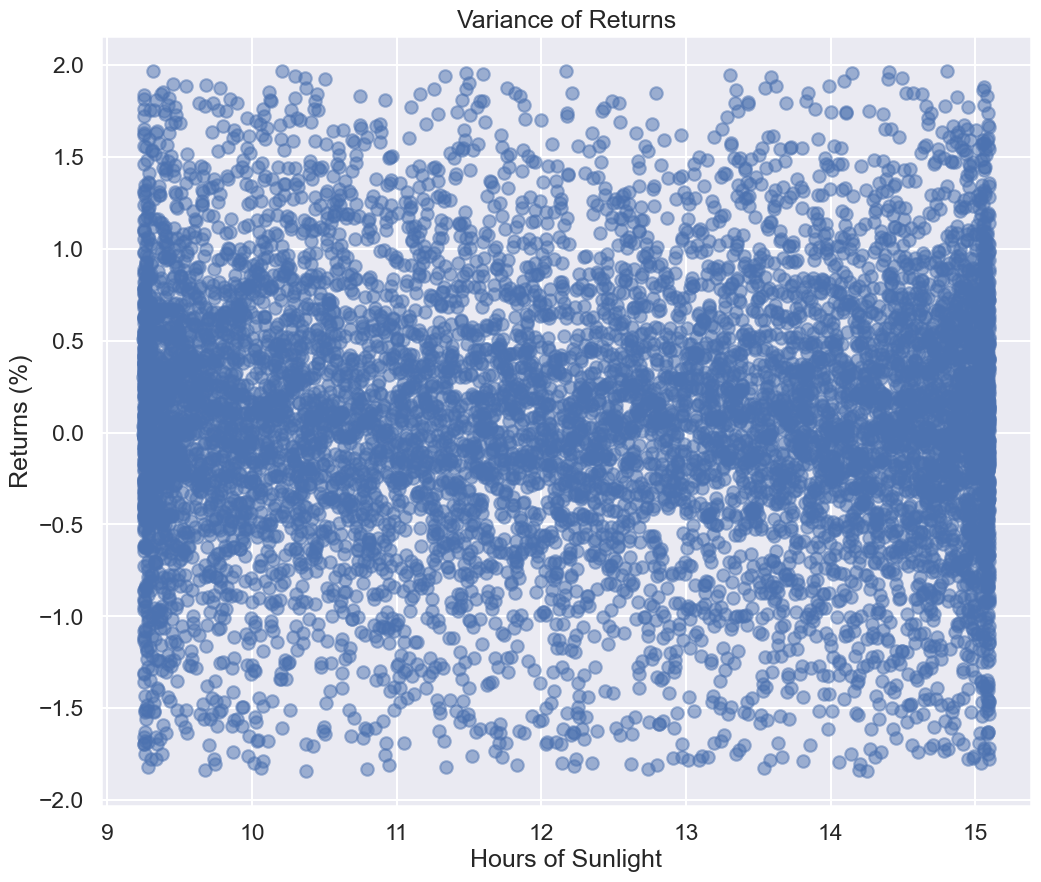

In [47]:
#scatter plot of returns vs HOS without outliers
plt.figure(figsize=(12,10))

plt.scatter(x = NYC_no_outliers['HOS_Numeric'], y=NYC_no_outliers['Returns'], alpha=0.5)
plt.title('Variance of Returns')
plt.xlabel('Hours of Sunlight')
plt.ylabel('Returns (%)')

plt.savefig('../images/Variance_Returns_no.png')

Without the presence of outliers, a pattern is now visible
- Returns between 11 to 13 HOS appear to be more condensed towards 0% returns
- The variance of returns appears to increase towards either extreme of the sunlight spectrum
    - Days in which there is very little or lots of sunlight

In [34]:
#Saving dataframe as .csv for later use
NYSE_Weather.to_csv('../data/NYSE_Weather.csv', index= False)
NYC_no_outliers.to_csv('../data/NYC_no_outliers.csv', index= False)
Monthly_NYC.to_csv('../data/Monthly_averages.csv', index= False)
